In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, multilabel_confusion_matrix
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression

In [2]:
data_raw=pd.read_csv("./data/Train.csv")

In [3]:
from files.preprocessing import preprocessing

In [4]:
data = preprocessing(data_raw, use_location=False, only_means=False)

/Users/denniseickhorn/neuefische/ML-Project-1/files/preprocessing.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(features,1,inplace=True)


In [5]:
data

,target,max_temp,min_temp,mean_temp,var_temp,median_temp,ptp_temp,last_temp,mean_last_day_temp,max_precip,...,last_wind_spd,mean_last_day_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press,last_atmos_press,mean_last_day_atmos_press
0,45.126304,27.208333,19.275000,22.299527,6.728895,21.358333,7.933333,19.583333,22.299527,0.000,...,0.855000,0.677348,87.871667,87.614167,87.752434,0.004952,87.762083,0.257500,87.768333,87.752434
1,79.131702,33.616667,17.983333,24.679063,18.206903,23.791667,15.633333,21.450000,24.082639,0.561,...,1.019167,0.879410,90.725000,90.056667,90.429924,0.024336,90.429167,0.668333,90.529167,90.539896
2,32.661304,31.841667,18.458333,24.112317,14.261020,23.304167,13.383333,30.091667,25.931944,7.804,...,1.746667,1.020764,88.813333,87.982500,88.420931,0.032213,88.425000,0.830833,88.415833,88.296007
3,53.850238,27.491667,16.941667,20.845273,9.487259,19.541667,10.550000,24.641667,21.240625,25.787,...,1.852500,1.038472,88.685000,87.965000,88.376915,0.026166,88.400000,0.720000,88.465833,88.383681
4,177.418750,28.750000,17.525000,21.870732,10.803515,20.950000,11.225000,20.616667,22.053693,0.136,...,0.735000,0.811370,88.719167,88.268333,88.538104,0.014011,88.552500,0.450833,88.465833,88.517525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15534,44.850286,27.841667,16.550000,20.573209,8.926124,19.458333,11.291667,24.991667,20.956250,31.842,...,1.204167,0.752396,88.730000,87.890833,88.382934,0.035106,88.393333,0.839167,88.405833,88.523681
15535,24.330455,29.550000,18.991667,23.546832,6.838117,23.208333,10.558333,27.925000,23.642708,9.046,...,2.023333,1.046146,88.704167,88.082500,88.435840,0.020040,88.450000,0.621667,88.432500,88.386910
15536,38.972128,34.108333,16.950000,24.637083,18.945097,24.179167,17.158333,28.458333,24.472222,3.893,...,2.435000,1.249896,90.885000,90.145833,90.522397,0.026004,90.520000,0.739167,90.568333,90.451979
15537,41.720952,30.900000,15.891667,23.472934,21.635547,23.066667,15.008333,30.308333,23.041730,0.017,...,1.285833,0.771269,90.793333,90.106667,90.486202,0.025839,90.512500,0.686667,90.326667,90.507292


[Text(0.5, 1.0, 'mean atmosphere pressure'), Text(0, 0.5, 'atm')]

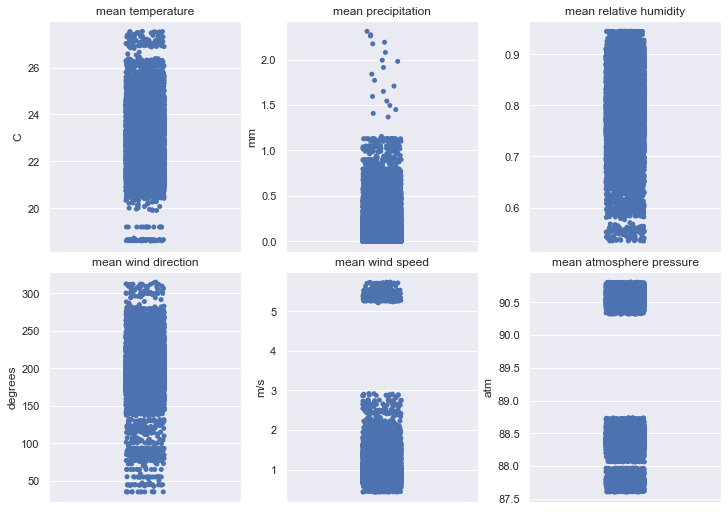

In [62]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7), constrained_layout=True)

#sns.set(rc = {'figure.figsize':(2,7)})
ax = sns.stripplot(ax=axes[0,0], y='mean_temp', data=data)
ax.set(title='mean temperature', ylabel='C')
ax = sns.stripplot(ax=axes[0,1], y='mean_precip', data=data)
ax.set(title='mean precipitation', ylabel='mm')
ax = sns.stripplot(ax=axes[0,2], y='mean_rel_humidity', data=data)
ax.set(title='mean relative humidity', ylabel='')
ax = sns.stripplot(ax=axes[1,0], y='mean_wind_dir', data=data)
ax.set(title='mean wind direction', ylabel='degrees')
ax = sns.stripplot(ax=axes[1,1], y='mean_wind_spd', data=data)
ax.set(title='mean wind speed', ylabel='m/s')
ax = sns.stripplot(ax=axes[1,2], y='mean_atmos_press', data=data)
ax.set(title='mean atmosphere pressure', ylabel='atm')

[Text(0.5, 1.0, 'last hour'), Text(0, 0.5, '')]

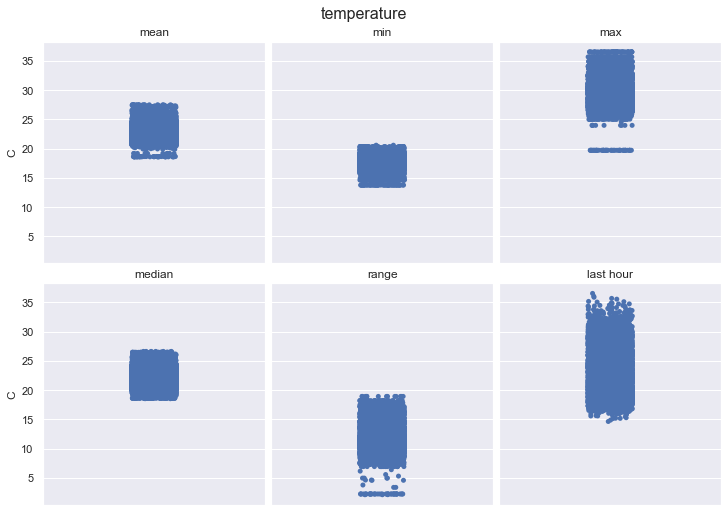

In [69]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7), constrained_layout=True, sharey=True)
fig.suptitle('temperature', fontsize=16)

#sns.set(rc = {'figure.figsize':(2,7)})
ax = sns.stripplot(ax=axes[0,0], y='mean_temp', data=data)
ax.set(title='mean', ylabel='C')
ax = sns.stripplot(ax=axes[0,1], y='min_temp', data=data)
ax.set(title='min', ylabel='')
ax = sns.stripplot(ax=axes[0,2], y='max_temp', data=data)
ax.set(title='max', ylabel='')
ax = sns.stripplot(ax=axes[1,0], y='median_temp', data=data)
ax.set(title='median', ylabel='C')
ax = sns.stripplot(ax=axes[1,1], y='ptp_temp', data=data)
ax.set(title='range', ylabel='')
ax = sns.stripplot(ax=axes[1,2], y='last_temp', data=data)
ax.set(title='last hour', ylabel='')